# Chapter 3 - Unsupervised Learning and Preprocessing
비지도 학습과 데이터 전처리

<br></br>
## 1 비지도 학습의 종류
1. 데이터의 비지도 변환 (transformation)
2. 데이터의 비지도 군집 (clustering)

### 01 비지도 변환 (군집 알고리즘)
<strong>해석하기 쉽게 변환</strong>하는 알고리즘 ex)차원축소

데이터 <strong>구성단위나 성분</strong>을 찾는다 ex)텍스트에서 문서의 주제 추출

### 02 비지도 학습의 과제
답이 정해지지 않은 문제를 풀어야 하는 특성상, <strong>알고리즘이 유용성 평가</strong>가 어려운 과제이다.

때문에 <strong>분석가가 직접 눈으로 평가</strong>하는 방법이 유일한 경우가 많아서, <strong>탐색적 분석 단계</strong>에서 가장 많이 사용한다

<br></br>
## 2 데이터 전처리와 스케일의 조정
SVM같은 알고리즘은 스케일에 민감하다

데이터 특성값의 조정을 통해서 데이터를 변경한다
### 01 데이터의 전처리

In [1]:
import numpy as np

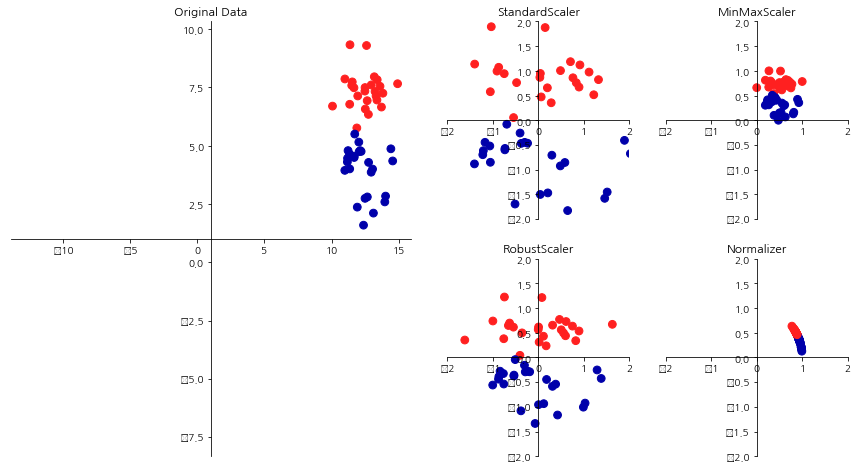

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('font', family='NanumGothic')

from data import mglearn
mglearn.plots.plot_scaling()

In [3]:
# 다양한 정규화 모델 결과해석
# 정규화는 특성벡터의 길이와는 무관하고, 데이터의 방향(각도)만 중요할 때 많이 사용한다
# 1.StandardScaler : 특성을 평균 0, 분산 1로 변경하나, 최대/최소값을 제한하지 않는다
# 2.RobustScaler : StandardScaler 비슷하나, 평균/분산 대신, 중간/사분위 값을 사용하여 이상치 영향을 최소화 한다
# 3.MinMaxScaler : 모든 특성이 0과 1 사이에 위치하도록 데이터를 변경한다
# 4.Normalizer : 특성 벡터의 '유클리디안 길이'가 1이 되도록 데이터를 조정한다 (데이터 분포 구(Sphere) 지금이 1인 원(circle)을 투영한다.)

### 02 데이터 변환 적용하기
MinMaxScaler()를 활용한 유방암 데이터 전처리 (총 30개의 컬럼으로 구성된 데이터를 분석)

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [5]:
# Train 데이터 스케일 조정

# 최대/ 최솟값 스케일 조절을 사용한다
# 스케일 조절시 X_train 만 넘겨주고, y_train은 적용하지 않는다(불필요 하므로)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)                        # 최대/최소 알고지름으로 데이터를 변환
X_train_scaled = scaler.transform(X_train) # 변환한 데이터를 별도 객체로 출력

print("변환 전 데이터 크기(data shape)        : {}".format(X_train.shape))
print("변환 후 데이터 크기(transformed shape) : {}".format(X_train_scaled.shape))
print("스케일 조정 전 필드별 최소값 (per-feature minimum before scaling) :\n {}".format(X_train.min(axis=0)))
print("스케일 조정 전 필드별 최대값 (per-feature maximum before scaling) :\n {}".format(X_train.max(axis=0)))
print("스케일 조정 후 필드별 최소값 (per-feature minimum after scaling) :\n {}".format(
    X_train_scaled.min(axis=0)))
print("스케일 조정 후 필드별 최대값 (per-feature maximum after scaling) :\n {}".format(
    X_train_scaled.max(axis=0)))

변환 전 데이터 크기(data shape)        : (426, 30)
변환 후 데이터 크기(transformed shape) : (426, 30)
스케일 조정 전 필드별 최소값 (per-feature minimum before scaling) :
 [  6.98100000e+00   9.71000000e+00   4.37900000e+01   1.43500000e+02
   5.26300000e-02   1.93800000e-02   0.00000000e+00   0.00000000e+00
   1.06000000e-01   5.02400000e-02   1.15300000e-01   3.60200000e-01
   7.57000000e-01   6.80200000e+00   1.71300000e-03   2.25200000e-03
   0.00000000e+00   0.00000000e+00   9.53900000e-03   8.94800000e-04
   7.93000000e+00   1.20200000e+01   5.04100000e+01   1.85200000e+02
   7.11700000e-02   2.72900000e-02   0.00000000e+00   0.00000000e+00
   1.56600000e-01   5.52100000e-02]
스케일 조정 전 필드별 최대값 (per-feature maximum before scaling) :
 [  2.81100000e+01   3.92800000e+01   1.88500000e+02   2.50100000e+03
   1.63400000e-01   2.86700000e-01   4.26800000e-01   2.01200000e-01
   3.04000000e-01   9.57500000e-02   2.87300000e+00   4.88500000e+00
   2.19800000e+01   5.42200000e+02   3.11300000e-02   1.35400000e-01
   3.

In [6]:
# Test 데이터 스케일 조정

X_test_scaled = scaler.transform(X_test)
print("스케일 조절 후 필드별 최소값 (per-feature minimum after scaling) :\n{}".format(X_test_scaled.min(axis=0)))
print("스케일 조절 전 필드별 최대값 (per-feature maximum after scaling) :\n{}".format(X_test_scaled.max(axis=0)))

스케일 조절 후 필드별 최소값 (per-feature minimum after scaling) :
[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
스케일 조절 전 필드별 최대값 (per-feature maximum after scaling) :
[ 0.9578778   0.81501522  0.95577362  0.89353128  0.81132075  1.21958701
  0.87956888  0.9333996   0.93232323  1.0371347   0.42669616  0.49765736
  0.44117231  0.28371044  0.48703131  0.73863671  0.76717172  0.62928585
  1.33685792  0.39057253  0.89612238  0.79317697  0.84859804  0.74488793
  0.9154725   1.13188961  1.07008547  0.92371134  1.20532319  1.63068851]


In [7]:
# 모델해석
# 1. Train 데이터는 0과 1 사이의 값으로 데이터가 변환 되었다
# 2. Train의 최대/최소값만 기준이 되어서, Test 데이터는 1을 벗어나고 '-' 값으로도 출력된다
# 이를 극복하기 위한 방법을 알아보자

### 03 훈련 데이터와 테스트 데이터의 스케일을 같은 기준으로 조정
Train과 Test 에 같은 기준을 적용하는 방법을 찾아보자

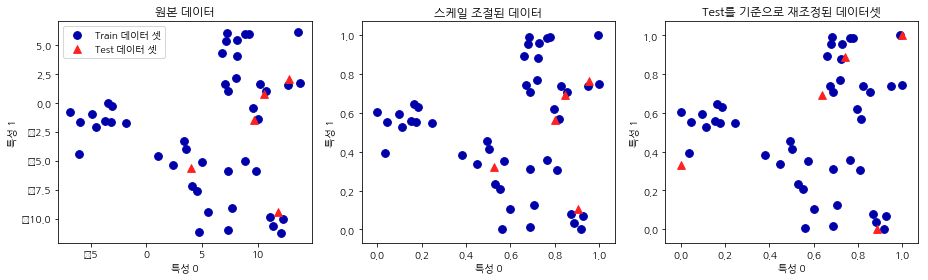

In [8]:
# Test 데이터를 기준으로 전처리
from sklearn.datasets import make_blobs

# 인위적 데이터 생성, Train/ Test 데이터 나누기
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

# Train/ Test 산점도 그리기
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1],
                c=mglearn.cm2(0), label="Train 데이터 셋", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
                c=mglearn.cm2(1), label="Test 데이터 셋", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("원본 데이터")

# MinMaxScaler()로 스케일을 조절
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 스케일 조절된 데이터를 산점도로 그린다
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2(0), label="Training set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',
                c=mglearn.cm2(1), label="Test set", s=60)
axes[1].set_title("스케일 조절된 데이터")

# Test 데이터 셋을 기준으로 조절하나, 이는 실전에선 사용해선 안됩니다!!!!
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# Test를 기준으로 재 조정한 데이터셋
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2(0), label="training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1],
                marker='^', c=mglearn.cm2(1), label="test set", s=60)
axes[2].set_title("Test를 기준으로 재조정된 데이터셋")

for ax in axes:
    ax.set_xlabel("특성 0"); ax.set_ylabel("특성 1")
fig.tight_layout()

In [9]:
# 3번째 그래프는 빨간 Test를 기준으로 데이터가 재정렬 되어, Test 배치가 2번쨰와 많이 차이가 난다
# 모든 전처리 모듈이 .fit, .transform 메서드를 제공한다

In [10]:
# 표준화 모듈을 사용하여 전처리 작업을 한다
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# 연속적인 메서드 적용
# 전처리로 작업내용이 제한된 만큼 이 경우에는 효과적으로 사용가능하다
X_scaled = scaler.fit(X_train).transform(X_train)
X_scaled_d = scaler.fit_transform(X_train)

### 04 지도학습에서 데이터 전처리
유방암 데이터셋을 SVC 분석시 전처리 모듈별 효과 비교

In [11]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
svm = SVC(C=100)
svm.fit(X_train, y_train)
print("Test 데이터 셋의 accuracy: {:.2f}".format(svm.score(X_test, y_test)))

Test 데이터 셋의 accuracy: 0.63


In [12]:
# 전처리 1 : 0 ~ 1로 데이터를 전처리
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 전처리 데이터로 SVM 학습
svm.fit(X_train_scaled, y_train)
print("스케일 조정 후 Test 데이터 셋의 accuracy: {:.2f}".format(
    svm.score(X_test_scaled, y_test)))

스케일 조정 후 Test 데이터 셋의 accuracy: 0.97


In [13]:
# 전처리 2 : 평균 0, 분산 1로 스케일 조절
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 전처리 데이터로 SVM 학습
svm.fit(X_train_scaled, y_train)
print("SVM test 데이터 셋의 accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

SVM test 데이터 셋의 accuracy: 0.96


<br></br>
## 3 차원의 축소, 데이터 특성 추출, 매니폴드 학습
시각화를 위한 데이터 압축, 추가적 처리를 위해 특징적 feacture의 추출 을 목적
1. 주성분 분석 PCA (Principal Component Analysis)
2. 비음수 행렬 분해 NMF (Non Negative matrix factorization)
3. t-SNE (t-distributed stochastic neighbor embadding) : 2차원 산점도를 이용한 시각화 정보 추출용

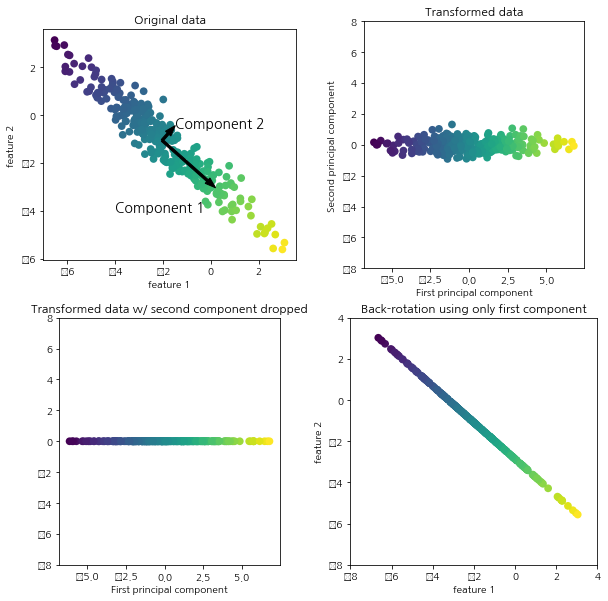

In [14]:
mglearn.plots.plot_pca_illustration()

In [15]:
# 모델의 해석
# 1 Original data 는 원본 데이터 포인트를 색으로 구분하여 표시한 것으로, 주성분은 component 1이 된다
# 2 Transformed data 는 주성분 1과 2를 각 x축과 y축에 나란하도록 PCA에 의해 회전을 하였다
# 3 Transformed data w/second component 는 주성분만 추출하여 2차원을 1차원 데이터로 표시한 것이다
# 4 Back-rotation using only first component 는 데이터 평균을 더해서 반대로 회전을 되돌린다

### 01 <strong>PCA 주성분 분석</strong>
PCA 분석을 활용하여 유방암 데이터 셋 (30개의 필드 데이터를 2차원 표 위에 정렬) 시각화 하기

2개 이상의 feature를 갖는 데이터는 산점도로 표시하기가 어렵다

iris의 경우는 4개의 속성을 2개씩 나누어 표현하는 방식으로 가능하지만 30개 이상인 데이터에 적용은 힘들다

<h4> 1) 히스토그램을 활용한 유방암 데이터 셋 분석 </h4> 
30개의 필드 데이터를 2차원 표 위에 시각화 하기 위해서

Target을 특징으로 나눠서 Histogram을 그리는 방법이다

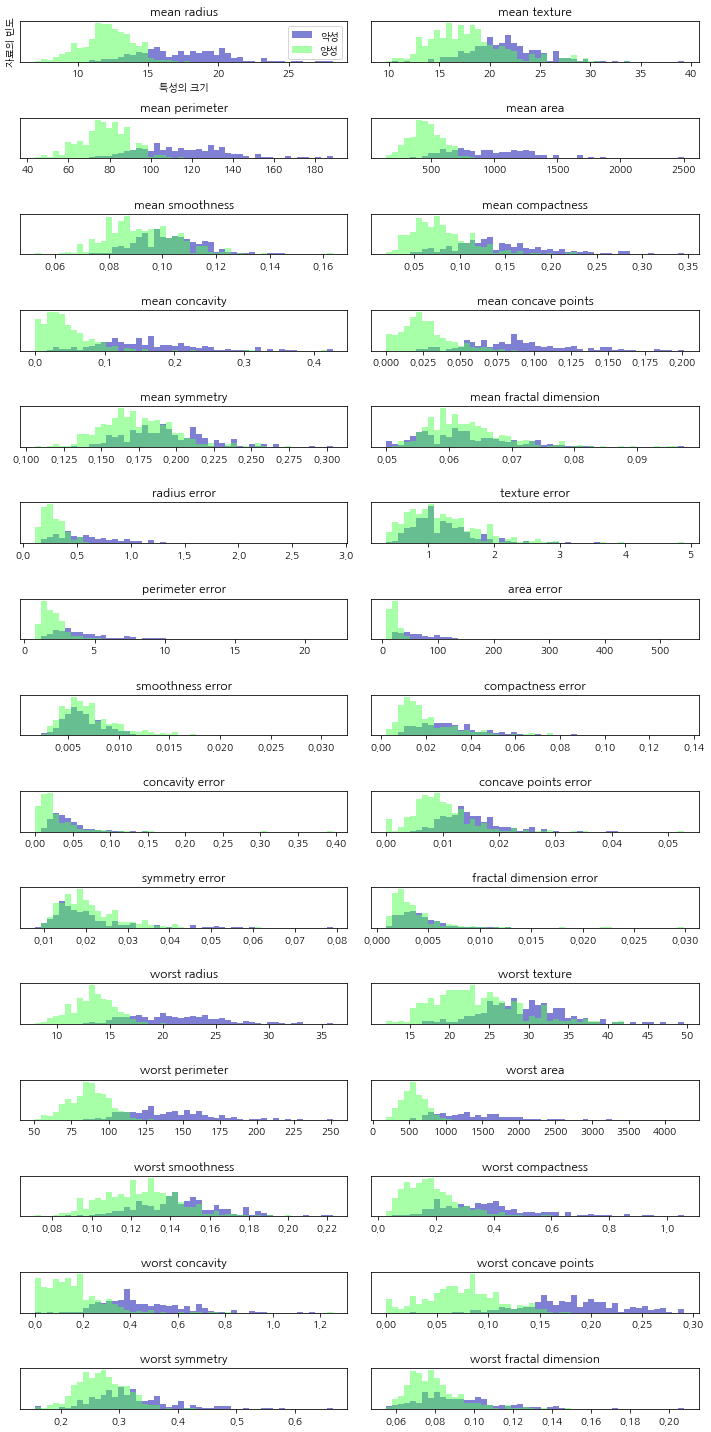

In [16]:
import numpy as np
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign    = cancer.data[cancer.target == 1]

ax = axes.ravel()
for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("특성의 크기"); ax[0].set_ylabel("자료의 빈도")
ax[0].legend(["악성", "양성"], loc="best"); fig.tight_layout()

In [17]:
# 결과해석
# 각 특성별 '히스토그램'을 출력한 것으로써
# '특정간격'(bin)내에 얼마나 데이터가 분포하는지를 횟수로 계산한 결과이다
# 파란색이 악성, 녹색이 양성으로 각 포인트의 위치를 출력한다
# worst concave points 의 경우, 양성과 음성 분리가 잘 된 분류에 해당한다 (오른쪽 아래서 3번쨰 위 히스토그램)

# 한계
# feacture간의 상호작용이 어떤 관련이 있는지는 전혀 알 수 없다
# PCA 분석을 사용하면 feature간의 상호작용을 알 수 있다

<h4> 2) PCA 분석을 활용한 유방암 데이터 셋 분석 </h4> 
feature간의 상호작용을 고려한 데이터셋 축약하기

In [18]:
#분산이 1이 되도록 데이터 스케일 조절
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

scaler = StandardScaler()  # 기본 표준화 옵션을 사용
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [19]:
# PCA 주성분 분석을 실시한다
from sklearn.decomposition import PCA
pca = PCA(n_components=2)       # 가장 빈도가 높은 2개의 주성분만 유지시킨다 (나머지는 제외)
pca.fit(X_scaled)               # X_scaled 에서 주성분을 찾는다
X_pca = pca.transform(X_scaled) # 주성분을 중심으로 데이터를 회전시켜서 차원을 줄인다
print("원본 데이터의 형태 (Original shape): {}".format(str(X_scaled.shape)))
print("축소 데이터의 형태 (Reduced shape) : {}".format(str(X_pca.shape)))

원본 데이터의 형태 (Original shape): (569, 30)
축소 데이터의 형태 (Reduced shape) : (569, 2)


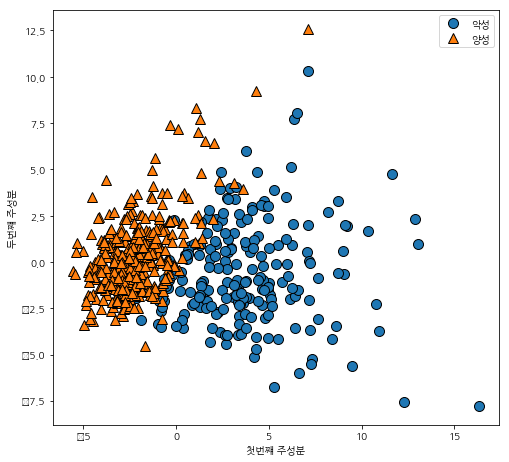

In [20]:
# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(['악성', '양성'], loc="best") # cancer.target_names
plt.gca().set_aspect("equal")
plt.xlabel("첫번쨰 주성분"); plt.ylabel("두번쨰 주성분")

In [21]:
# 결과해석
# 주성분 분석은 '비지도학습'으로, 클래스의 정보를 사용하지 않고 오직 '상관관계'만을 고려한다
# 주성분 분석은 '원본데이터'의 '어떤 방향에 대응하는 특성의 조합'이기 때문에, 구체적 어느 요소인지를 알긴 어렵다
# 주성분의 내용은 components_ 속성에 저장된다

In [22]:
print("PCA 주성분의 형태 : {}".format(pca.components_.shape))
print("PCA 주성분의 내용 :\n{}".format(pca.components_))

PCA 주성분의 형태 : (2, 30)
PCA 주성분의 내용 :
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


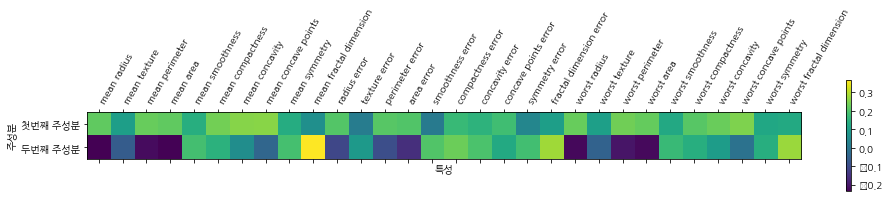

In [23]:
# 분석한 PCA 주성분 내용을 Heat Map으로 시각화
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["첫번째 주성분", "두번째 주성분"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
plt.xlabel("특성"); plt.ylabel("주성분")

In [24]:
# 주성분 내용분석
# 첫번째 주성분은 데이터가 모두 동일하다, 이는 모든 특성들과 '양의 상관관계'를 갖는 결과값을 출력하기 때문이다
# 두번쨰 주성분은 부호가 섞여있다. 때문에 이는 첫번째 주성분과 차이를 나타내어 둘간의 의미를 설명하기가 어렵다

#### 3) 고유얼굴(eigen_face) 특성 추출
원본을 축약한 정보로써 eigen_face 정보를 활용한다

이는 주로 <strong>'이미지 특성(RGB)을 추출'</strong>하는데 사용한다

===================================================================  on Lan connect ======

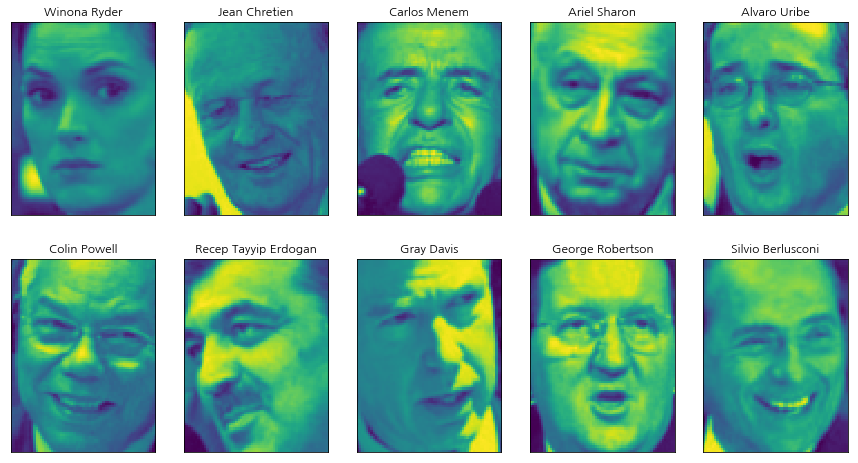

In [25]:
# Labeled Faces in the Wild 데이터셋을 활용하여, PCA 이미지 특성 추출
from sklearn.datasets import fetch_lfw_people

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})

for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [28]:
print("people.images.shape: {}".format(people.images.shape))
print("클래스의 갯수 (Number of classes): {}".format(len(people.target_names)))

people.images.shape: (3023, 87, 65)
클래스의 갯수 (Number of classes): 62


In [29]:
# 각 target(인물) 이 나타난 횟수를 계산
counts = np.bincount(people.target)
# target(인물)별 이름과 횟수를 출력
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end='   ')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39   Alvaro Uribe               35   Amelie Mauresmo            21   
Andre Agassi               36   Angelina Jolie             20   Ariel Sharon               77   
Arnold Schwarzenegger      42   Atal Bihari Vajpayee       24   Bill Clinton               29   
Carlos Menem               21   Colin Powell              236   David Beckham              31   
Donald Rumsfeld           121   George Robertson           22   George W Bush             530   
Gerhard Schroeder         109   Gloria Macapagal Arroyo    44   Gray Davis                 26   
Guillermo Coria            30   Hamid Karzai               22   Hans Blix                  39   
Hugo Chavez                71   Igor Ivanov                20   Jack Straw                 28   
Jacques Chirac             52   Jean Chretien              55   Jennifer Aniston           21   
Jennifer Capriati          42   Jennifer Lopez             21   Jeremy Greenstock          24   
Jiang Zemin                20 

In [30]:
# 인물별 사진데이터 숫자를 50개로 한정한다
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

# 0 ~ 255 사이의 흑백 이미지 픽셀을 0~1의 스케일로 전처리를 한다
# MinMaxScaler() 작업의 결과와 거의 동일한 값을 출력한다
X_people = X_people / 255.

In [31]:
# KNN 훈련을 통해서 이지미를 분류한다
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0) # Train/ Test로 데이터를 나눈다
knn = KNeighborsClassifier(n_neighbors=1)                  # KNN 이웃 갯수는 1개, 모델을 생성한다
knn.fit(X_train, y_train)
print("1-nn (1 최근접 이웃)의 테스트 점수: {:.2f}".format(knn.score(X_test, y_test)))

1-nn (1 최근접 이웃)의 테스트 점수: 0.25


In [32]:
# 결과해석
# 분석결과 0.23이 나온다
# 무작위 분류시 1.6% 인식률에 비해 양호하나, 서비스를 제공가능한 형태는 아니다
# 이미지의 인식률을 높이기 위하여 PCA Whiting (PCA 백색화) 옵션을 사용하여 주성분 스케일이 같도록 조정한다
# 이미지가 약간의 오차로도 별개의 이미지 인식하는 문제를 극복하기 위한 해결방법이다
# PCA Whiting은, 옵션없이 변환 후 StandardScaler를 적용하는 것과 동일한 결과를 출력한다

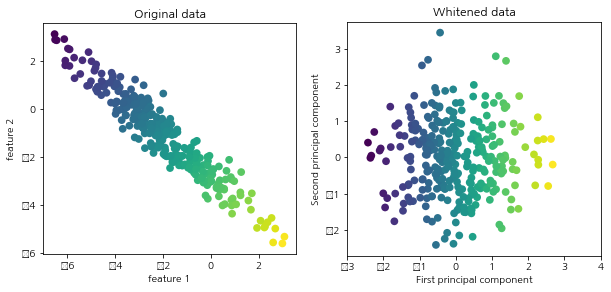

In [33]:
%matplotlib inline
from data import mglearn
mglearn.plots.plot_pca_whitening()

In [34]:
# 이미지 분석인 만큼, 100개의 주성분을 추출하여 모델을 생성한다
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape: {}".format(X_train_pca.shape))

X_train_pca.shape: (1547, 100)


In [35]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)

print("Test 데이터 셋의 정확도 (accuracy): {:.2f}".format(knn.score(X_test_pca, y_test)))
print("pca.components_.shape: {}".format(pca.components_.shape))

Test 데이터 셋의 정확도 (accuracy): 0.31
pca.components_.shape: (100, 5655)


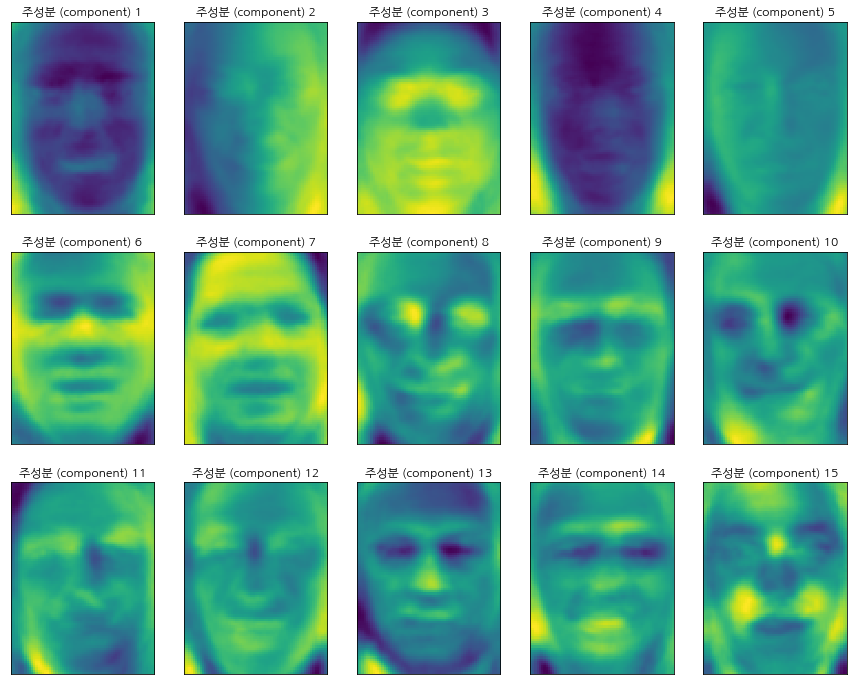

In [36]:
fig, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape),cmap='viridis')
    ax.set_title("주성분 (component) {}".format((i + 1)))

In [37]:
# 결과해석
# 데이터를 해석하는 방식은 사람마다 상당히 다르다는 점을 우선 전제로 이해 하여야 한다
# 100개의 주성분을 관찰하여 분석한 결과, 이미지의 특징으로 어떤것을 추출하였는지를 짐작할 수 있다
# PCA 해석방법으로는 몇개의 주성분을 사용하여 원본을 재구성 하는 것이다
# 이를 통해 해당 주성분이 어느 부위 어떤 특징을 추출 한 것인지를 확인 가능하다

________________________________________________________________________________
[Memory] Calling data.mglearn.plot_pca.pca_faces...
pca_faces(array([[ 0.522876, ...,  0.368627],
       ..., 
       [ 0.019608, ...,  0.839216]], dtype=float32), 
array([[ 0.467974, ...,  0.75817 ],
       ..., 
       [ 0.326797, ...,  0.337255]], dtype=float32))
_______________________________________________________pca_faces - 20.7s, 0.3min


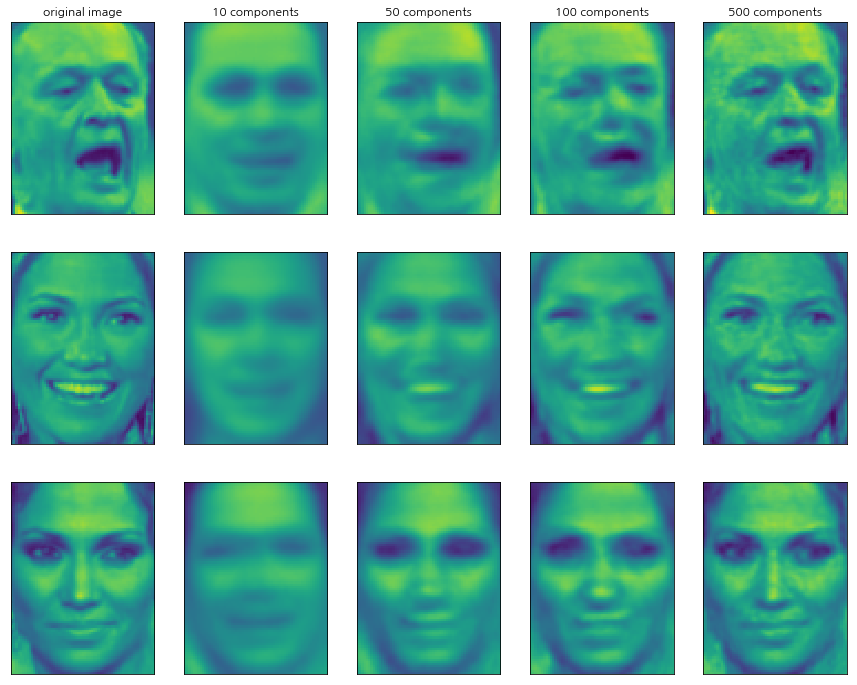

In [38]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

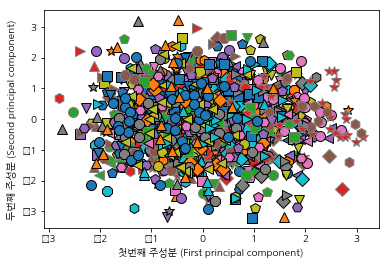

In [39]:
# 데이터 셋 분류를 2차원 평면에 점으로 표시하기
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)
plt.xlabel("첫번째 주성분 (First principal component)")
plt.ylabel("두번째 주성분 (Second principal component)")

### 02 <strong>비음수 행렬의 분해 (NMF)</strong>
Non-negative Matrix Factorization은 PCA와 비슷하고, 차원 축소에서도 사용 가능하다

PCA는 분산이 크고 수직관계인 성분을 찾았다면

NMF는 음수가 아닌 성분과 계수의 값을 찾는다 (주성분과 계수가 모두 0보다 크거나 같아야 한다)

NMF는 '음성 데이터'같이 여러 독립된 소스들이 덮어써서 작성된 데이터에 특히 유용하다

'eigen_face'(고유얼굴) 같은 경우는 양수, 음수 데이터를 모두 갖고있지만 양수와 음수가 어떻한 규칙을 갖지는 않는다

#### 1) 인위적 데이터에 NMF 적용하기
NMF는 우선적으로 데이터가 '+'인지를 확인해야 한다 

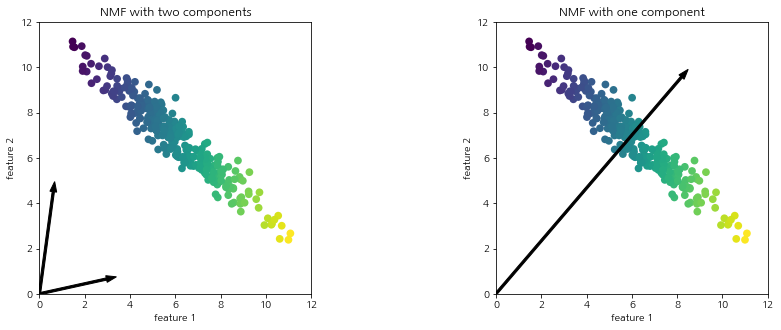

In [40]:
mglearn.plots.plot_nmf_illustration()

In [41]:
# 결과해석
# 왼쪽은 성분이 2인 NMF로, 데이터셋의 모든 포인트가 '+'로 이루어진 두개의 성분으로 표현 가능하다
# 오른쪽은 성분이 1개인 NMF로, 평균으로 향하는 성분을 사용한다
# PCA와 달리 성분의 갯수를 줄이면 '전체 성분'이 완전히 바뀌어 버린다
# NMF 분석은 무작위로 초기화를 하므로, '난수 생성 초기값'에 따라 결과가 달라진다 (feactor가 많아질수록 영향이 크다)

#### 2) 얼굴 이미지에  NMF 적용하기
LFW 데이터 셋에 NMF를 적용하여 분석해보자

________________________________________________________________________________
[Memory] Calling data.mglearn.plot_nmf.nmf_faces...
nmf_faces(array([[ 0.522876, ...,  0.368627],
       ..., 
       [ 0.019608, ...,  0.839216]], dtype=float32), 
array([[ 0.467974, ...,  0.75817 ],
       ..., 
       [ 0.326797, ...,  0.337255]], dtype=float32))
_____________________________________________________nmf_faces - 997.4s, 16.6min


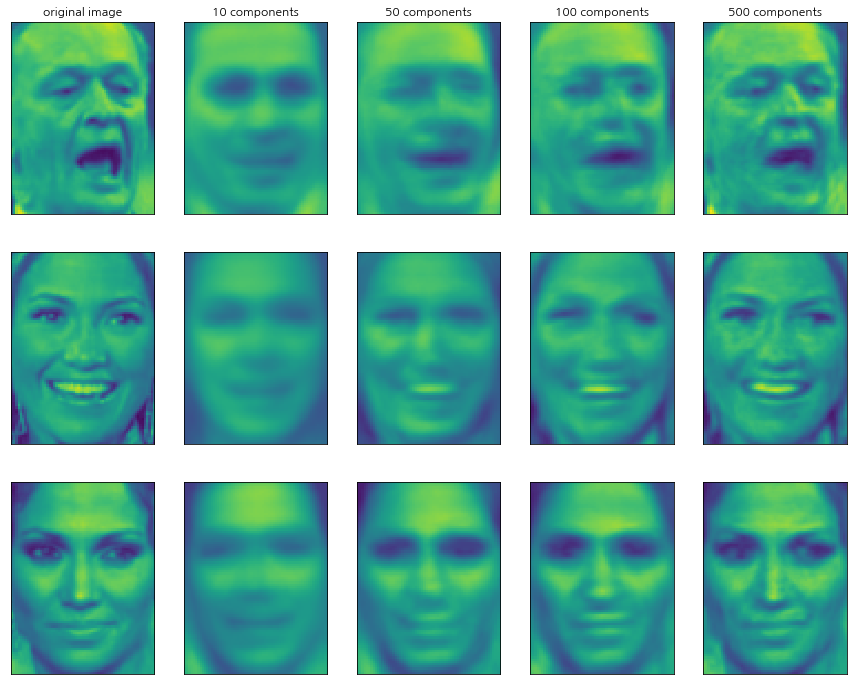

In [42]:
mglearn.plots.plot_nmf_faces(X_train, X_test, image_shape)

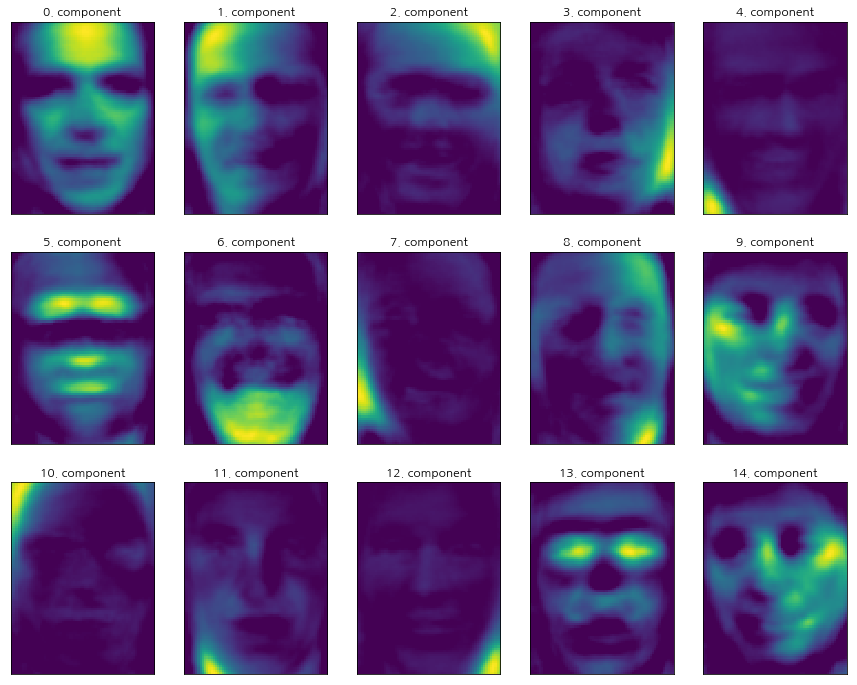

In [43]:
# PCA가 '데이터 재구성'에는 보다 효과적인 결과를 찾아준다
# NMF는 '데이터 유용한 패턴'을 찾는데 유용하다

from sklearn.decomposition import NMF

nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fig, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("{}. component".format(i))

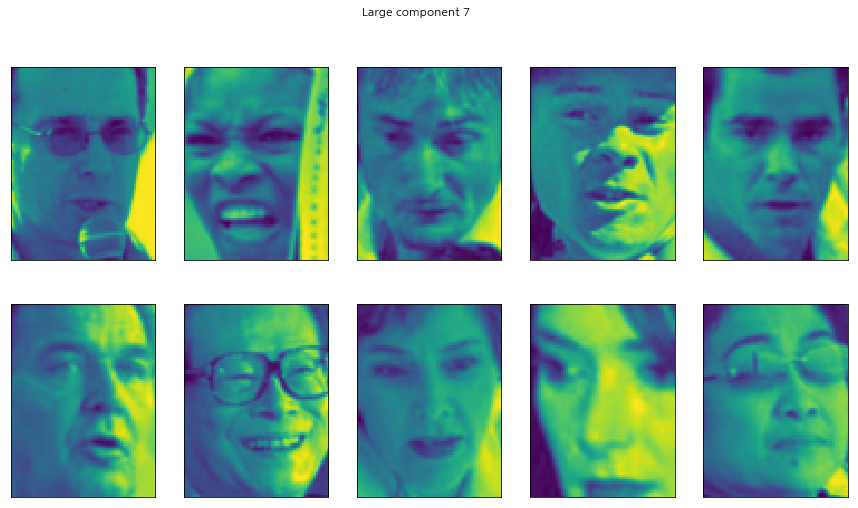

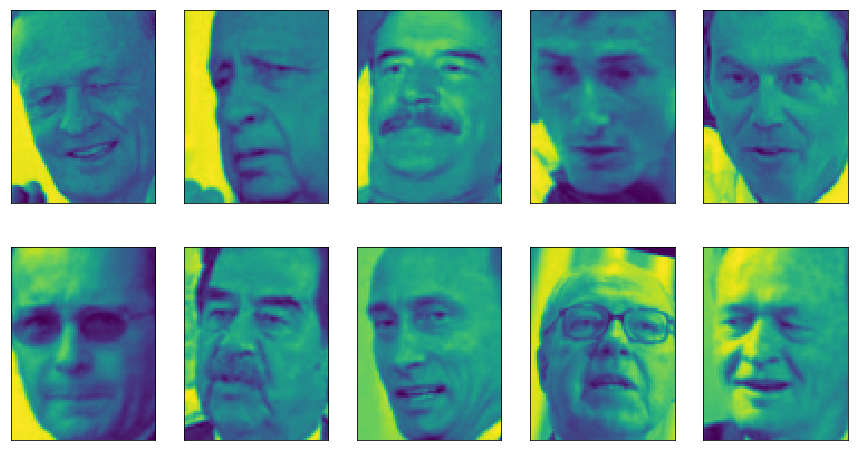

In [44]:
# NMF 분석결과 중 성분이 강하게 나타난, 3번쨰 7번째 이미지를 분석해보자

compn = 3 # 3번쨰 성분으로 정렬 후, 처음 10개의 이미지를 출력한다
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("Large component 3")
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

compn = 7 # 7번쨰 성분으로 정렬 후, 처음 10개의 이미지를 출력한다
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig.suptitle("Large component 7")
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

In [45]:
# 결과해석
# 성분 7 이미지는 왼쪽으로 돌아가 있고, 11번쨰 이미지부터 오른쪾으로 돌아가 있다
# 이와 같이 패턴추출하는데 NMF가 유용한 결과를 출력한다

#### 3) 인위적인 3개의 신호데이터에  NMF 적용하기
패턴 분석에 어떤결과를 나타내는지 관찰해보자

(2000, 3)

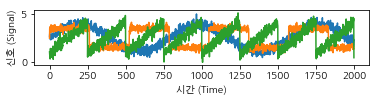

In [46]:
S = mglearn.datasets.make_signals()
plt.figure(figsize=(6, 1))
plt.plot(S, '-')
plt.xlabel("시간 (Time)")
plt.ylabel("신호 (Signal)")
S.shape

In [47]:
# S 원본데이터를 사용하여 100개의 측정 데이터를 생성
A = np.random.RandomState(0).uniform(size=(100, 3))
X = np.dot(S, A.T)
print("측정 데이터 형태 : {}".format(X.shape))

측정 데이터 형태 : (2000, 100)


In [48]:
# nmf를 사용하여 3개의 신호를 복원한다
from sklearn.decomposition import NMF

nmf = NMF(n_components=3, random_state=42)
S_ = nmf.fit_transform(X)
print("Recovered signal shape: {}".format(S_.shape))

Recovered signal shape: (2000, 3)


In [49]:
# PCA 방법을 사용하여 신호를 복원한다
pca = PCA(n_components=3)
H = pca.fit_transform(X)

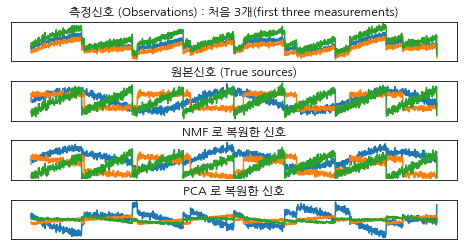

In [50]:
# NMF 와 PCA로 찾은 신호를 비교하여 출력해본다
models = [X, S, S_, H]
names = ['측정신호 (Observations) : 처음 3개(first three measurements)',
         '원본신호 (True sources)',
         'NMF 로 복원한 신호',
         'PCA 로 복원한 신호']

fig, axes = plt.subplots(4, figsize=(8, 4), gridspec_kw={'hspace': .5},
                         subplot_kw={'xticks': (), 'yticks': ()})

for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')

In [51]:
# 결과해석
# NMF는 개별 속성을 잘 복원하여 구별하였지만 (병렬적 데이터 인식에 탁월)
# PCA는 첫 주성분 속성을 기준으로 복원하여, 패턴의 복원에 실패 하였다 (직렬적 데이터 인식)
# 패천추출
# 관련하여 독립성분분석(ICA), 요인분석(FA), 희소코딩(Sparse Coding)-딕셔너리 학습 을 참고하면 된다

### 03 <strong>t-SNE를 이용한 매니폴드 학습</strong> (manifold learning)
PCA 분석이 데이터 변환시 2차원 산점도 표현에 유용하여 많이 쓰이지만

알고리즘 특성상 적용범위가 한정되는 단점이 있다

보다 복잡한 매핑을 통한 시각화를 위해서는 <strong>t-SNE</strong> 알고리즘을 많이 사용한다

<strong>매니폴드 학습 (manifold learning)</strong> 알고리즘 목적이 '시각화'이기 때문에 3개 이상 특성을 뽑는 경우는 드물다

t-SNE를 포함한 일부 알고리즘들은, 훈련 데이터에 바로 적용만 가능하고, 다른 데이터에는 별도의 학습을 요한다

#### 1) 숫자를 PCA로 분류하기
비교를 위한 PCA 분류 Test

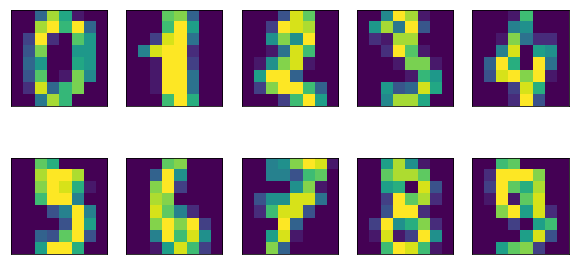

In [52]:
from sklearn.datasets import load_digits
digits = load_digits()
fig, axes = plt.subplots(2, 5, figsize=(10, 5),
                         subplot_kw={'xticks':(), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

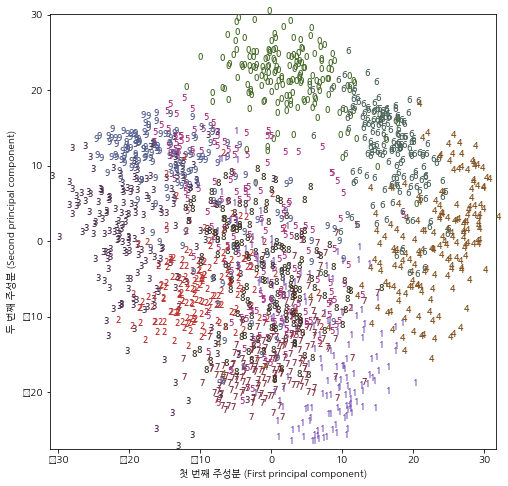

In [53]:
# PCA 모델을 생성한다
# 분산이 큰 2개의 주성분을 활용하여 데이터를 분류한다
pca = PCA(n_components=2)
pca.fit(digits.data)

# 처음 두개의 주성분으로 숫자 데이터를 변환한다
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(8, 8))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())

for i in range(len(digits.data)):
    # plt.text(x, y, string) : 숫자 텍스트를 이용하여 산점도를 시각화
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("첫 번째 주성분 (First principal component)")
plt.ylabel("두 번째 주성분 (Second principal component)")

In [54]:
# 결과해석
# 0, 6, 4는 분류가 잘 된 것으로 보이지만, 대부분의 숫자는 겹치는 영역이 많은 것이 관찰된다

#### 2) 숫자를 t-SNE로 분류하기
t-SNE는 새로운 데이터로 변환하는 기능이 제공되지 않아, .transform 메서드가 없다

대신에 모델을 만들자 마자 데이터를 변환하는 fit_transform 메서드를 사용한다

In [55]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)

# TSNE 에서는 .transform 대신에 .fit_transform 메서드로 변환한다
digits_tsne = tsne.fit_transform(digits.data)

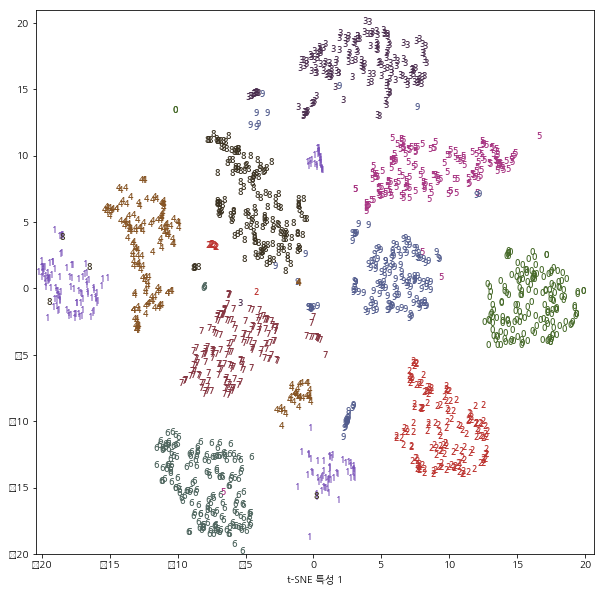

In [56]:
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digits.data)):
    # actually plot the digits as text instead of using scatter
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE 특성 0"); plt.xlabel("t-SNE 특성 1")

In [57]:
# 결과해석
# 클래스의 정보를 전혀 사용하지 않은, 비지도학습 방식의 분류 알고리즘이다
# 각자 고유한 pattern을 갖는 데이터의 경우, PCA에 비해 훨씬 뛰어난 분류결과를 나타낸다
# t-SNE는 매개변수를 약간 조정해야 하지만, 기본값 만으로도 잘 작동하는 경우가 많다

<br></br>
## 4 군집
Clustering 은 데이터셋을 Cluster 라는 그룹으로 나누는 작업이다

### 01 <strong>K-평균</strong> 군집
K-mean clustering

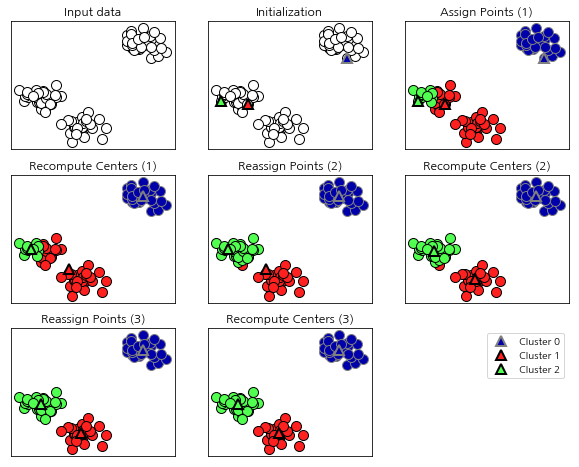

In [58]:
mglearn.plots.plot_kmeans_algorithm()

In [59]:
# 결과해석
# 삼각형 : 각 클러스터의 중심을 나타낸다.
# 초기에는 임의의 삼각형 3개의 점을 찾는다
# 이후 k-mean 거리측정 알고리즘을 반복하면서 중심의 위치를 갱신한다
# 반복 후에도 '포인트의 변화'가 없는 경우에는 알고리즘을 멈춘다

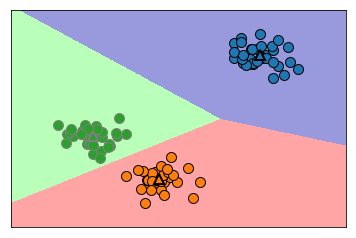

In [60]:
mglearn.plots.plot_kmeans_boundaries()
# 53번 라인까지 학습완료